# **CONDITIONAL BUFFERS**
*To create buffer around polygons (builtup features) based on two attributes ‘s_type’ (sprawl type) and ‘s_patterns’ (sprawl pattern). The required buffer distances are given below.*
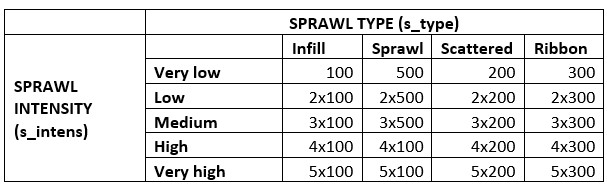
- Open the builtup file
- Add buffer distance column based on sprawl type
- Add buffer distance column based on sprawl intensity
- Add buffer distance column and compute the product of above two columns
- Based on above buffer distance create buffer
- Write the output to geopackage file

In [1]:
#open the vector data
import os
data_pkg_path = 'dummy_data_f'
filename = 'builtup.gpkg'
path = os.path.join(data_pkg_path, filename)

In [2]:
#how to list all layers in geopackge? Hint: use fiona package
import fiona
layers = fiona.listlayers(path)
layers

['builtup']

In [3]:
import geopandas as gpd
builtup = gpd.read_file(path, layer='builtup')
print(builtup.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5938 entries, 0 to 5937
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   type2     5938 non-null   object  
 1   s_type    5938 non-null   object  
 2   s_intens  5938 non-null   object  
 3   geometry  5938 non-null   geometry
dtypes: geometry(1), object(3)
memory usage: 185.7+ KB
None


In [4]:
buffer_type = {
    'Infill': 100,
    'Sprawl': 500,
    'Scattered': 200,
    'Ribbon':300
}

buffer_weight = {
    'very low': 1,
    'low': 2,
    'medium': 3,
    'high':4,
    'very high':5
}

def set_value(row):
    s_type = row['s_type']
    s_intens = row['s_intens']
    buffer_type_value = buffer_type[s_type]
    buffer_intens_value = buffer_weight[s_intens]
    distance = buffer_type_value * buffer_intens_value
    return distance

builtup['buffer_distance'] = builtup.apply(set_value, axis=1)

In [5]:
builtup

,type2,s_type,s_intens,geometry,buffer_distance
0,new,Scattered,very low,"MULTIPOLYGON (((179257.500 1321252.500, 179247...",200
1,new,Scattered,very low,"MULTIPOLYGON (((179127.246 1321138.411, 179137...",200
2,new,Scattered,very low,"MULTIPOLYGON (((175840.781 1319357.651, 175812...",200
3,new,Scattered,very low,"MULTIPOLYGON (((174467.373 1319305.789, 174472...",200
4,new,Scattered,very low,"MULTIPOLYGON (((174352.500 1319212.500, 174337...",200
...,...,...,...,...,...
5933,new,Scattered,medium,"MULTIPOLYGON (((194278.196 1268273.163, 194278...",600
5934,new,Scattered,medium,"MULTIPOLYGON (((194486.505 1269157.206, 194471...",600
5935,new,Scattered,medium,"MULTIPOLYGON (((194441.076 1269328.073, 194423...",600
5936,new,Scattered,medium,"MULTIPOLYGON (((193606.312 1270353.039, 193594...",600


In [6]:
builtup['geometry'] = builtup['geometry'].buffer(builtup['buffer_distance'])

In [7]:
builtup['dissolvefield'] = 1
dissolved = builtup.dissolve(by='dissolvefield')

In [8]:
#save buffered output to new file
output_dir = 'output'
output_filename = 'con_buf_dissolved.gpkg'
output_path = os.path.join(output_dir, output_filename)

dissolved.to_file(driver='GPKG', filename=output_path, encoding='utf-8')
print('Successfully written output file at {}'.format(output_path))

Successfully written output file at output\con_buf_dissolved.gpkg
